In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as spio
from scipy.optimize import fsolve, root
import copy
from pyswarm import pso

pi = math.pi

def pied (x):
    while x>pi:
        x -= pi
    return (x)

def pi2ed (x):
    while x>pi/2:
        x -= pi/2
    return (x)

data = np.load("sphere_render/meas_simulation.npz")
Is = data['I']
Iups = data['Iups']
Ips = data['Ips']
psis = data['psis']
xmap = data['xmap']
ymap = data['ymap']
phis0 = data['phis']
thetas0 = data['thetas']
dm = data['dm']

ymax, xmax, imax = Is.shape

phis = np.zeros((ymax,xmax))
thetas = np.zeros((ymax,xmax))
ns = np.zeros((ymax,xmax))

ph = 1
th = 1
n = 1.6
kol = 0
fal = 0

def nearest_nonzero_idx(a,x,y):
    idx = np.argwhere(a)
    return idx[((idx - [x,y])**2).sum(1).argmin()]

def fill_with_neasest(ymap):
    a = copy.deepcopy(ymap)
    for y in range (0, ymap.shape[0]):
        for x in range(0,ymap.shape[0]):
            if a[y,x] == 0:
                y1, x1 = nearest_nonzero_idx(a, y, x)
                a[y,x] = a[y1,x1]
    return a



In [2]:
def indtoangle (psj, thj):
    return (psj*2*pi/1000 - pi, thj*(pi/2)/1000)

def angletoind (ph, th):
    thmap = int(math.floor(th*xmap.shape[0]/(pi/2+0.1)))
    phmap = int(math.floor((ph+pi)*xmap.shape[1]/(2*pi+0.1)))
    return (phmap*5, thmap*5)

In [3]:
def nextcoords (y,x,c):
    dx = x-c
    dy = y-c
    if dx==0 and dy==0:
        return (y,x+1)
    if dy<0 and abs(dx)<=abs(dy):
        return(y, x+1)
    if dx<0 and abs(dx)>=abs(dy):
        return(y-1, x)
    if dy>0 and abs(dx)<=abs(dy):
        return(y, x-1)
    if dx>0 and abs(dx)>=abs(dy):
        return(y+1, x)

In [4]:
def system (p, *args):
    angles = [0, pi/6, pi/3, pi/2, 2*pi/3, 5*pi/6]
    ph, th, n = p
    I = args[0]
    thmap = int(math.floor(th*xmap.shape[0]/(pi/2+0.1)))
    phmap = int(math.floor((ph+pi)*xmap.shape[1]/(2*pi+0.1)))
    if (0<thmap<200) and (0<phmap<200):
        x = int(xmap[thmap,phmap])
        y = int(ymap[thmap,phmap])
    else:
        x = y = 0
        
        
    Iup = Iups[y,x]
    Ip = Ips[y,x]
    ps = psis[y,x]
#     print (y,x, dm[y,x], I)
#     I = Is[y,x,:].flatten()
#     print (Iup, Ip, ps, I, ph, th, n)
    if (np.isnan(dm[y,x])) or ((max(I)-min(I))<0.001) or n<1:
        return (100, 100, 100, 100, 100, 100)
    return (
        (Iup/2) * (((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(math.sin(ph - angles[0]))**2 + (((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(1 - (math.sin(ph - angles[0]))**2)) + Ip*((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.cos(ps))**2) + ((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.sin(ps))**2))*(math.cos(math.atan((math.tan(ps))*math.sqrt((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)/((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2))) + ph - angles[0]))**2 - I[0],
        (Iup/2) * (((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(math.sin(ph - angles[1]))**2 + (((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(1 - (math.sin(ph - angles[1]))**2)) + Ip*((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.cos(ps))**2) + ((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.sin(ps))**2))*(math.cos(math.atan((math.tan(ps))*math.sqrt((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)/((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2))) + ph - angles[1]))**2 - I[1],
        (Iup/2) * (((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(math.sin(ph - angles[2]))**2 + (((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(1 - (math.sin(ph - angles[2]))**2)) + Ip*((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.cos(ps))**2) + ((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.sin(ps))**2))*(math.cos(math.atan((math.tan(ps))*math.sqrt((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)/((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2))) + ph - angles[2]))**2 - I[2],
        (Iup/2) * (((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(math.sin(ph - angles[3]))**2 + (((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(1 - (math.sin(ph - angles[3]))**2)) + Ip*((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.cos(ps))**2) + ((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.sin(ps))**2))*(math.cos(math.atan((math.tan(ps))*math.sqrt((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)/((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2))) + ph - angles[3]))**2 - I[3],
        (Iup/2) * (((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(math.sin(ph - angles[4]))**2 + (((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(1 - (math.sin(ph - angles[4]))**2)) + Ip*((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.cos(ps))**2) + ((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.sin(ps))**2))*(math.cos(math.atan((math.tan(ps))*math.sqrt((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)/((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2))) + ph - angles[4]))**2 - I[4],
        (Iup/2) * (((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(math.sin(ph - angles[5]))**2 + (((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(1 - (math.sin(ph - angles[5]))**2)) + Ip*((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.cos(ps))**2) + ((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.sin(ps))**2))*(math.cos(math.atan((math.tan(ps))*math.sqrt((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)/((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2))) + ph - angles[5]))**2 - I[5]
    )

def systempso (p, *args):
    angles = [0, pi/6, pi/3, pi/2, 2*pi/3, 5*pi/6]
    ph, th, n = p
    I = args
#     print (args)
    thmap = int(math.floor(th*xmap.shape[0]/(pi/2+0.1)))
    phmap = int(math.floor((ph+pi)*xmap.shape[1]/(2*pi+0.1)))
    if (0<thmap<200) and (0<phmap<200):
        x = int(xmap[thmap,phmap])
        y = int(ymap[thmap,phmap])
    else:
        x = y = 0
    Iup = Iups[y,x]
    Ip = Ips[y,x]
    ps = psis[y,x]
#     print (y,x, dm[y,x], I)
    if (np.isnan(dm[y,x])) or ((max(I)-min(I))<0.001):
        return 100
    return (
        ((Iup/2) * (((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(math.sin(ph - angles[0]))**2 + (((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(1 - (math.sin(ph - angles[0]))**2)) + Ip*((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.cos(ps))**2) + ((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.sin(ps))**2))*(math.cos(math.atan((math.tan(ps))*math.sqrt((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)/((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2))) + ph - angles[0]))**2 - I[0])**2 +
        ((Iup/2) * (((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(math.sin(ph - angles[1]))**2 + (((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(1 - (math.sin(ph - angles[1]))**2)) + Ip*((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.cos(ps))**2) + ((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.sin(ps))**2))*(math.cos(math.atan((math.tan(ps))*math.sqrt((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)/((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2))) + ph - angles[1]))**2 - I[1])**2 +
        ((Iup/2) * (((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(math.sin(ph - angles[2]))**2 + (((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(1 - (math.sin(ph - angles[2]))**2)) + Ip*((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.cos(ps))**2) + ((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.sin(ps))**2))*(math.cos(math.atan((math.tan(ps))*math.sqrt((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)/((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2))) + ph - angles[2]))**2 - I[2])**2 +
        ((Iup/2) * (((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(math.sin(ph - angles[3]))**2 + (((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(1 - (math.sin(ph - angles[3]))**2)) + Ip*((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.cos(ps))**2) + ((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.sin(ps))**2))*(math.cos(math.atan((math.tan(ps))*math.sqrt((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)/((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2))) + ph - angles[3]))**2 - I[3])**2 +
        ((Iup/2) * (((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(math.sin(ph - angles[4]))**2 + (((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(1 - (math.sin(ph - angles[4]))**2)) + Ip*((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.cos(ps))**2) + ((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.sin(ps))**2))*(math.cos(math.atan((math.tan(ps))*math.sqrt((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)/((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2))) + ph - angles[4]))**2 - I[4])**2 +
        ((Iup/2) * (((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(math.sin(ph - angles[5]))**2 + (((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(1 - (math.sin(ph - angles[5]))**2)) + Ip*((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.cos(ps))**2) + ((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.sin(ps))**2))*(math.cos(math.atan((math.tan(ps))*math.sqrt((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)/((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2))) + ph - angles[5]))**2 - I[5])**2
    )

def systempsoabs (p, *args):
    angles = [0, pi/6, pi/3, pi/2, 2*pi/3, 5*pi/6]
    ph, th, n = p
    I = args
#     print (args)
    thmap = int(math.floor(th*xmap.shape[0]/(pi/2+0.1)))
    phmap = int(math.floor((ph+pi)*xmap.shape[1]/(2*pi+0.1)))
    if (0<thmap<200) and (0<phmap<200):
        x = int(xmap[thmap,phmap])
        y = int(ymap[thmap,phmap])
    else:
        x = y = 0
    Iup = Iups[y,x]
    Ip = Ips[y,x]
    ps = psis[y,x]
#     print (y,x, dm[y,x], I)
    if (np.isnan(dm[y,x])) or ((max(I)-min(I))<0.001):
        return 100
    return (
        abs((Iup/2) * (((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(math.sin(ph - angles[0]))**2 + (((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(1 - (math.sin(ph - angles[0]))**2)) + Ip*((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.cos(ps))**2) + ((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.sin(ps))**2))*(math.cos(math.atan((math.tan(ps))*math.sqrt((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)/((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2))) + ph - angles[0]))**2 - I[0]) +
        abs((Iup/2) * (((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(math.sin(ph - angles[1]))**2 + (((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(1 - (math.sin(ph - angles[1]))**2)) + Ip*((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.cos(ps))**2) + ((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.sin(ps))**2))*(math.cos(math.atan((math.tan(ps))*math.sqrt((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)/((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2))) + ph - angles[1]))**2 - I[1]) +
        abs((Iup/2) * (((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(math.sin(ph - angles[2]))**2 + (((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(1 - (math.sin(ph - angles[2]))**2)) + Ip*((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.cos(ps))**2) + ((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.sin(ps))**2))*(math.cos(math.atan((math.tan(ps))*math.sqrt((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)/((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2))) + ph - angles[2]))**2 - I[2]) +
        abs((Iup/2) * (((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(math.sin(ph - angles[3]))**2 + (((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(1 - (math.sin(ph - angles[3]))**2)) + Ip*((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.cos(ps))**2) + ((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.sin(ps))**2))*(math.cos(math.atan((math.tan(ps))*math.sqrt((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)/((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2))) + ph - angles[3]))**2 - I[3]) +
        abs((Iup/2) * (((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(math.sin(ph - angles[4]))**2 + (((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(1 - (math.sin(ph - angles[4]))**2)) + Ip*((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.cos(ps))**2) + ((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.sin(ps))**2))*(math.cos(math.atan((math.tan(ps))*math.sqrt((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)/((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2))) + ph - angles[4]))**2 - I[4]) +
        abs((Iup/2) * (((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(math.sin(ph - angles[5]))**2 + (((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(1 - (math.sin(ph - angles[5]))**2)) + Ip*((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.cos(ps))**2) + ((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.sin(ps))**2))*(math.cos(math.atan((math.tan(ps))*math.sqrt((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)/((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2))) + ph - angles[5]))**2 - I[5])
    )

def system1 (p, *args):
    angles = [0, pi/6, pi/3, pi/2, 2*pi/3, 5*pi/6]
    ph, th, n = p
    I = args[0]
#     print (I)
    thmap = int(math.floor(th*xmap.shape[0]/(pi/2+0.1)))
    phmap = int(math.floor((ph+pi)*xmap.shape[1]/(2*pi+0.1)))
    if (0<thmap<200) and (0<phmap<200):
        x = int(xmap[thmap,phmap])
        y = int(ymap[thmap,phmap])
    else:
        x = y = 0
    Iup = Iups[y,x]
    Ip = Ips[y,x]
    ps = psis[y,x]
#     if 1.5<n<1.7:
#         return(100,100,100,100,100,100)
    n2 = n**2
    if n2 < 1:
        n2 = n2 + 1
    Ip = 0
    ps = 0
    sps2 = (math.sin(ps))**2
    cps2 = (math.cos(ps))**2
    tps = math.tan(ps)
    cth = math.cos(th)
    sth = math.sin(th)
#     print (n2, sth)
    Rs = ((cth - math.sqrt(n2 - sth**2))/(cth + math.sqrt(n2 - sth**2)))**2
    Rp = ((-n2*cth + math.sqrt(n2 - sth**2))/(n2*cth + math.sqrt(n2 - sth**2)))**2
#     print (I)
    return (
        (Iup/2) * (Rs*(math.sin(ph - angles[0]))**2 + Rp*(1 - (math.sin(ph - angles[0]))**2)) + Ip*(Rp*cps2 + Rs*sps2)*(math.cos(math.atan(tps*math.sqrt(Rp/Rs)) + ph - angles[0]))**2 - I[0],
        (Iup/2) * (Rs*(math.sin(ph - angles[1]))**2 + Rp*(1 - (math.sin(ph - angles[1]))**2)) + Ip*(Rp*cps2 + Rs*sps2)*(math.cos(math.atan(tps*math.sqrt(Rp/Rs)) + ph - angles[1]))**2 - I[1],
        (Iup/2) * (Rs*(math.sin(ph - angles[2]))**2 + Rp*(1 - (math.sin(ph - angles[2]))**2)) + Ip*(Rp*cps2 + Rs*sps2)*(math.cos(math.atan(tps*math.sqrt(Rp/Rs)) + ph - angles[2]))**2 - I[2],
        (Iup/2) * (Rs*(math.sin(ph - angles[3]))**2 + Rp*(1 - (math.sin(ph - angles[3]))**2)) + Ip*(Rp*cps2 + Rs*sps2)*(math.cos(math.atan(tps*math.sqrt(Rp/Rs)) + ph - angles[3]))**2 - I[3],
        (Iup/2) * (Rs*(math.sin(ph - angles[4]))**2 + Rp*(1 - (math.sin(ph - angles[4]))**2)) + Ip*(Rp*cps2 + Rs*sps2)*(math.cos(math.atan(tps*math.sqrt(Rp/Rs)) + ph - angles[4]))**2 - I[4],
        (Iup/2) * (Rs*(math.sin(ph - angles[5]))**2 + Rp*(1 - (math.sin(ph - angles[5]))**2)) + Ip*(Rp*cps2 + Rs*sps2)*(math.cos(math.atan(tps*math.sqrt(Rp/Rs)) + ph - angles[5]))**2 - I[5],
        n2 - 2.56
    )

In [5]:
xmap = fill_with_neasest(xmap)
ymap = fill_with_neasest(ymap)

In [79]:
# going through all angles and ns
y = 220
x = 320
ph = phis0[y,x]
th = thetas0[y,x]
n = 1.6
I = Is[y,x,:].flatten()
sz = 1000

res = np.zeros((sz, sz, 10))

nl = 1
for ll in range (0, 10):
    nl += 0.1
    psj = -pi
    for ii in range(0,sz):
        psj += 2*pi/sz
        thj = 0
        for jj in range(0,sz):
            thj += (pi/2)/sz
            res1 = system((psj, thj, nl), (I))
            res1 = [abs(xx) for xx in res1]
            res[ii, jj, ll] = sum(res1)
        

In [6]:
ind = np.unravel_index(np.argmin(res, axis=None), res.shape)
print(ind, res[ind])
print (indtoangle(ind[0], ind[1]))
print (ph,th)
# ff = angletoind(ph,th)
# print (ff, res[ff[0], ff[1]])

NameError: name 'res' is not defined

In [69]:
# going through all angles with fixed n
y = 220
x = 320
ph = phis0[y,x]
th = thetas0[y,x]
n = 1.6
I = Is[y,x,:].flatten()
sz = 1000

res = np.zeros((sz, sz))

psj = -pi
for ii in range(0,sz):
    psj += 2*pi/sz
    thj = 0
    for jj in range(0,sz):
        thj += (pi/2)/sz
        res1 = system((psj, thj, n), (I))
        res1 = [abs(xx) for xx in res1]
        res[ii, jj] = sum(res1)
        

In [34]:
# solving this shit for one pixel
y = 220
x = 320
ph = phis0[y,x]
th = thetas0[y,x]
n = 1.6
I = Is[y,x,:].flatten()
sz = 1000

sol = root(system, (ph, th, n), args=(I), method='lm', tol=0.000001)
print (sol.x[0], sol.x[1], sol.x[2])
res1 = system((sol.x[0], sol.x[1], sol.x[2]),(I))
res1 = [abs(xx) for xx in res1]
res = sum(res1)
print (res)

0.39564903020521547 0.772063916561229 1.6
1.240327285323417e-16


In [6]:
# solving this shit for one pixel using pso
y = 220
x = 320
ph = phis0[y,x]
th = thetas0[y,x]
print (ph,th)
# n = 1.6

# sz = 1000

lb = [ph-0.5, th-0.5, 1.1]
ub = [ph+0.5, th+0.5, 1.9]
for ii in range(0,10):
    I = Is[y,x,:].flatten()
#     sol, fopt = pso(systempsoabs, lb, ub, args=(I), minfunc=1e-20, minstep=1e-20, swarmsize=100, maxiter=2000)
    sol, fopt = pso(systempsoabs, lb, ub, args=(I), phip=2, phig=2, omega=0.7, swarmsize=1000, maxiter=2000)
    phis[y,x] = sol[0]
    thetas[y,x] = sol[1]
    ns[y,x] = sol[2]

    print (sol[0], sol[1], sol[2])
    print (fopt)

0.39564903020521547 0.7720639165612292
Stopping search: Swarm best objective change less than 1e-08
0.39564923224418425 0.7720633442980902 1.600000529501243
8.476331435271905e-08
Stopping search: Swarm best objective change less than 1e-08
0.08719477598333242 0.8604593952834337 1.5787329143505882
0.0015316868061115083
Stopping search: Swarm best objective change less than 1e-08
0.3956492206497752 0.7720654190338653 1.5999987909125764
1.8729723744257548e-07
Stopping search: Swarm best objective change less than 1e-08
0.395649211443202 0.772061955890728 1.6000017360702845
1.8335134660887875e-07


KeyboardInterrupt: 

In [ ]:
# solving this shit for whole image using pso
y = 220
x = 320
# ph = phis0[y,x]
# th = thetas0[y,x]
# n = 1.6

# sz = 1000

lb = [-pi, 0, 1.1]
ub = [pi, pi/2, 1.9]
for x in range(0, xmax):
    if x%50 == 0:
        print ("x =", x)
    for y in range (0, ymax):
        if np.isnan(dm[y,x]):
            continue
        I = Is[y,x,:].flatten()
        sol, fopt = pso(systempso, lb, ub, args=(I), minfunc=1e-15, swarmsize=500, maxiter=500)
        phis[y,x] = sol[0]
        thetas[y,x] = sol[1]
        ns[y,x] = sol[2]
        
# print (sol[0], sol[1], sol[2])
# print (fopt)

In [ ]:
lb = [-pi, 0, 1.1]
ub = [pi, pi/2, 1.9]
phis = np.zeros((ymax,xmax))
thetas = np.zeros((ymax,xmax))
ns = np.zeros((ymax,xmax))
c = 230
x = c
y = c
for i in range (0, 60000):
    if np.isnan(dm[y,x]):
        continue
    I = Is[y,x,:].flatten()
    
    if i%1==0:
#         sol, fopt = pso(systempsoabs, lb, ub, args=(I), minfunc=1e-15, minstep=1e-15, swarmsize=10000, maxiter=2000)
        ph0 = phis0[y,x]
        th0 = thetas0[y,x]
        lb = [max(-pi, ph0-0.5), max(0, th0-0.5), 1.1]
        ub = [min(pi, ph0+0.5), min(pi/2, th0+0.5), 1.9]
        sol, fopt = pso(systempsoabs, lb, ub, args=(I), swarmsize=2000, maxiter=2000)
        ph = sol[0]
        th = sol[1]
        n = sol[2]
        print (ph, th, n)
        print (phis0[y,x], thetas0[y,x], 1.6)
    else:
        try:
            sol = root(system, (ph, th, n), args=(I), method='lm', tol=0.000001)
        except:
            print (ph, th, n)
        ph = sol.x[0]
        th = sol.x[1]
        n = sol.x[2]
        
    phis[y,x] = ph
    thetas[y,x] = th
    ns[y,x] = n
    y,x = nextcoords(y,x,c)

Stopping search: Swarm best objective change less than 1e-08
2.857175378315179 0.008358618314369357 1.5944599405273818
2.357175378315179 0.27407186881601825 1.6
Stopping search: Swarm best objective change less than 1e-08
2.330393367817687 0.26788064987353827 1.5999463972929302
2.3302847434482965 0.2672407844735892 1.6
Stopping search: Swarm best objective change less than 1e-08
2.3573824422295075 0.2605856442561839 1.5999733809966927
2.3573295277599837 0.26015489120293556 1.6
Stopping search: Swarm best objective change less than 1e-08
2.508179139781181 0.1860589639003236 1.6160175772524512
2.382838471075378 0.26714650705621074 1.6
Stopping search: Swarm best objective change less than 1e-08
2.40676055856405 0.2737877009229948 1.6000531659050576
2.406901031609481 0.274436466641065 1.6
Stopping search: Swarm best objective change less than 1e-08
2.2083955784191285 0.4260531898335475 1.5368606690321502
2.3813962480638415 0.2811080210093465 1.6
Stopping search: Swarm best objective chang

Stopping search: Swarm best objective change less than 1e-08
2.2421265015020544 0.24739951920741562 1.5999997052683963
2.2421255780880647 0.24739324391155046 1.6
Stopping search: Swarm best objective change less than 1e-08
2.2679737946026397 0.2396600800336851 1.5999999521528256
2.2679736467536236 0.23965767362075885 1.6
Stopping search: Swarm best objective change less than 1e-08
2.294989529845576 0.23224885511054957 1.6000001166908404
2.294989843473768 0.23225200624832124 1.6
Stopping search: Swarm best objective change less than 1e-08
2.3248273128620607 0.22477379023575517 1.5999996670879255
2.3248246040930773 0.2247535402094769 1.6
Stopping search: Swarm best objective change less than 1e-08
2.5427570538993995 0.10024823004385819 1.601400084364465
2.3569054304284807 0.21847602578072264 1.6
Stopping search: Swarm best objective change less than 1e-08
2.2331362760441857 0.34251328465892394 1.5692063928032365
2.3881116754109484 0.22474561902364104 1.6
Stopping search: Swarm best objec

Stopping search: Swarm best objective change less than 1e-08
2.4952850950867145 0.3063582041471355 1.6000018062761674
2.495286463594754 0.30637256496255266 1.6
Stopping search: Swarm best objective change less than 1e-08
2.360756866914587 0.3959068085984958 1.556947242009783
2.4689475141691704 0.31222944972494304 1.6
Stopping search: Swarm best objective change less than 1e-08
2.2633682188070803 0.46782311909155727 1.51370013159049
2.445586210397189 0.3186721754640419 1.6
Stopping search: Swarm best objective change less than 1e-08
2.2604455317070657 0.462193009101274 1.5214950318137592
2.4225713710609886 0.3249136555716503 1.6
Stopping search: Swarm best objective change less than 1e-08
2.400712027939147 0.33163809244818415 1.6000406845742465
2.4007821931791313 0.3319081905769839 1.6


In [70]:
ind = np.unravel_index(np.argmin(res, axis=None), res.shape)
print(ind, res[ind])
print (indtoangle(ind[0], ind[1]))
print (ph,th)
ff = angletoind(ph,th)
print (ff, res[ff[0], ff[1]])

(562, 491) 0.0004317969958688708
(0.3895574890451341, 0.7712609964562943)
0.39564903020521547 0.7720639165612292
(550, 460) 0.07910843732989203


In [48]:
xmap.shape

(200, 200)

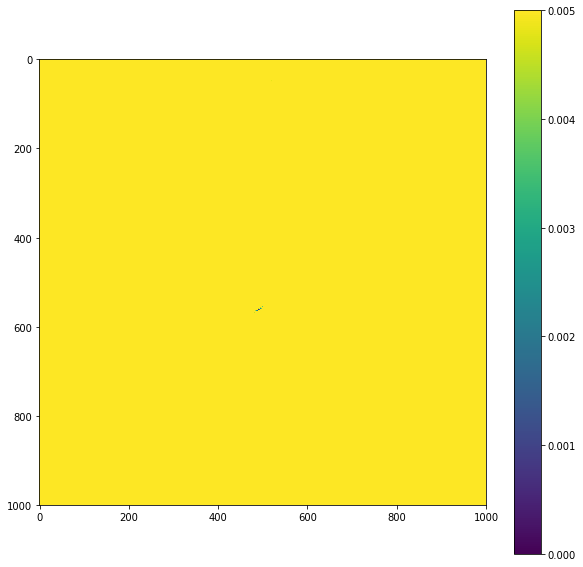

In [71]:
plt.figure(figsize=(10,10))
plt.imshow(res)
plt.colorbar()
plt.clim(0,0.005)
plt.show()

In [ ]:
y = 300
x = 250
ph = phis0[y,x]
th = thetas0[y,x]
th0 = 0.9
ph0 = 1.1
n = 1.6
I = Is[y,x,:].flatten()

sol = root(system1, (ph0, th0, 1.6), args=(I), method='lm', tol=0.000001)
print (sol.x[0], th, sol.x[2], system1((sol.x[0], sol.x[1], sol.x[2]),(I)))
print (ph, th, n, system1((ph, th, n),(I)))

In [ ]:
ph = 1.1
th = 0.9
phis = np.zeros((ymax,xmax))
thetas = np.zeros((ymax,xmax))
ns = np.zeros((ymax,xmax))
for y in range(0, 500):
    if y%100 == 0:
        print ("y =", y)
    for x in range (0, 500):
        if np.isnan(dm[y,x]):
            continue

        I = Is[y,x,:].flatten()
        sol = root(system1, (1.1, 0.9, 1.6), args=(I), method='lm', tol=0.00001)
            
        ph = pied(sol.x[0])
        th = pi2ed(sol.x[1])
        phis[y,x] = sol.x[0]
        thetas[y,x] = sol.x[1]
        ns[y,x] = sol.x[2]
        ress = system1((sol.x[0], sol.x[1], sol.x[2]), (I))
        ress1 = [abs(xx) for xx in ress]
#         print (sum(ress1), sol.x[2])

In [ ]:
res1 = system1((1.5796033696071434, 0.9459872649068347, 1.997700058230306), (I))
# print (ph, th)
print (res1)
res1 = [abs(xx) for xx in res1]
res0 = sum(res1)
print ("real =", res0)

In [ ]:
phsh = -pi + 375*2*pi/1000
thsh = 823*pi/(2*1000)
print (phsh, thsh)
res1 = system((phsh, thsh, 1.6))
print (res1)

In [ ]:
phsh = -pi + 592*2*pi/1000
thsh = 464*pi/(2*1000)
print (phsh, thsh)
res1 = system((phsh, thsh, 1.6))
print (res1)

In [ ]:
# res[ind] = 1
thetas[250,249]

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(phis)
plt.colorbar()
plt.clim(-pi,pi)
plt.show()


# 75*(pi/2+0.1)/100

In [ ]:
pi

### I get wrong minimum with 0 value. find the reason. 

Unfortunately, the method generates faulty mins. On the example above (50, 70) is the minimum, although not the correct one. And correct one won't appear, because 1 pixel error in remapping make it bigger than phantom min. This can be fixed in the simulation but won't work stable in the actual system.

In [ ]:
Run tests with:
    ps = 0
    Ip = 0
    
and see if I get classic results

In [ ]:
Is = data['I']
Iups = data['Iups']
Ips = data['Ips']
psis = data['psis']
xmap = data['xmap']
ymap = data['ymap']
phis0 = data['phis']
thetas0 = data['thetas']
dm = data['dm']

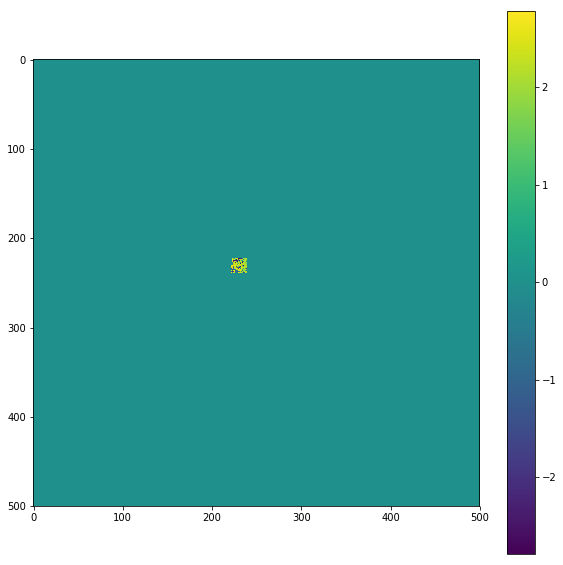

In [113]:
plt.figure(figsize=(10,10))
plt.imshow(phis)
plt.colorbar()
# plt.clim(0,1.7)
plt.show()